# Group 3 group project

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### Group members:

*   Del Bando, Denise Michelle
*   Lopez, Erwin
*   Miceli, Frank
*   Reus, Daniela

In [ ]:
#google sheet
# https://docs.google.com/spreadsheets/d/1eW16OK8EkkW8o5zXJoxS1YXfF0Z1HE1J/edit?usp=drive_link
# google drive
# https://drive.google.com/drive/folders/1ElQNE4O1mU_9iNSdRlMPUz75j1AFVdof

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import scatter
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
import random
from scipy.special import boxcox, inv_boxcox
import scipy
import statsmodels.formula.api as smf
import statsmodels.graphics.regressionplots as smg
import statsmodels.api as sm
import statsmodels.sandbox.stats.multicomp as mc
import sklearn.linear_model
# For visual inspection of the regression models
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot
import matplotlib.patches as mpatches
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Using google drive downloader
from google_drive_downloader import GoogleDriveDownloader as gdd

In [ ]:
# downloading csv data from google folder https://drive.google.com/file/d/1CRnWTlNAO2nGt0AITdWDm8zUP72j1GZ1/view?usp=sharing
gdd.download_file_from_google_drive(file_id="1CRnWTlNAO2nGt0AITdWDm8zUP72j1GZ1",
                                    dest_path="./Life Expectancy Data_updated.csv",
                                    unzip=False)

# SECTION 1: Read in + Analyze Data <a name="SECTION2"></a>

In [ ]:
#<Erwin>
# uploading to a dataframe
df = pd.read_csv('Life Expectancy Data_updated.csv',delimiter=',')
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [ ]:
#<Erwin>
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

In [ ]:
#<Haleh> Basic Checking of Data in Dataset:
# no. of duplicates
duplicates = len(df[df.duplicated()])

# no of missing values
missing_values = df.isnull().sum().sum()

print('Number of Duplicate Entries: %d'%(duplicates))
print('Number of Missing Values: %d'%(missing_values))
print('Number of Features: %d'%(df.shape[1]))
print('Number of Observations: %d'%(df.shape[0]))


Number of Duplicate Entries: 0
Number of Missing Values: 0
Number of Features: 21
Number of Observations: 2864


In [ ]:
#<Haleh>
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2864.0,2007.500000,4.610577,2000.000,2003.75000,2007.5000,2011.250000,2015.0000
Infant_deaths,2864.0,30.363792,27.538117,1.800,8.10000,19.6000,47.350000,138.1000
Under_five_deaths,2864.0,42.938268,44.569974,2.300,9.67500,23.1000,66.000000,224.9000
Adult_mortality,2864.0,192.251775,114.910281,49.384,106.91025,163.8415,246.791375,719.3605
Alcohol_consumption,2864.0,4.820882,3.981949,0.000,1.20000,4.0200,7.777500,17.8700
Hepatitis_B,2864.0,84.292598,15.995511,12.000,78.00000,89.0000,96.000000,99.0000
Measles,2864.0,77.344972,18.659693,10.000,64.00000,83.0000,93.000000,99.0000
BMI,2864.0,25.032926,2.193905,19.800,23.20000,25.5000,26.400000,32.1000
Polio,2864.0,86.499651,15.080365,8.000,81.00000,93.0000,97.000000,99.0000
Diphtheria,2864.0,86.271648,15.534225,16.000,81.00000,93.0000,97.000000,99.0000


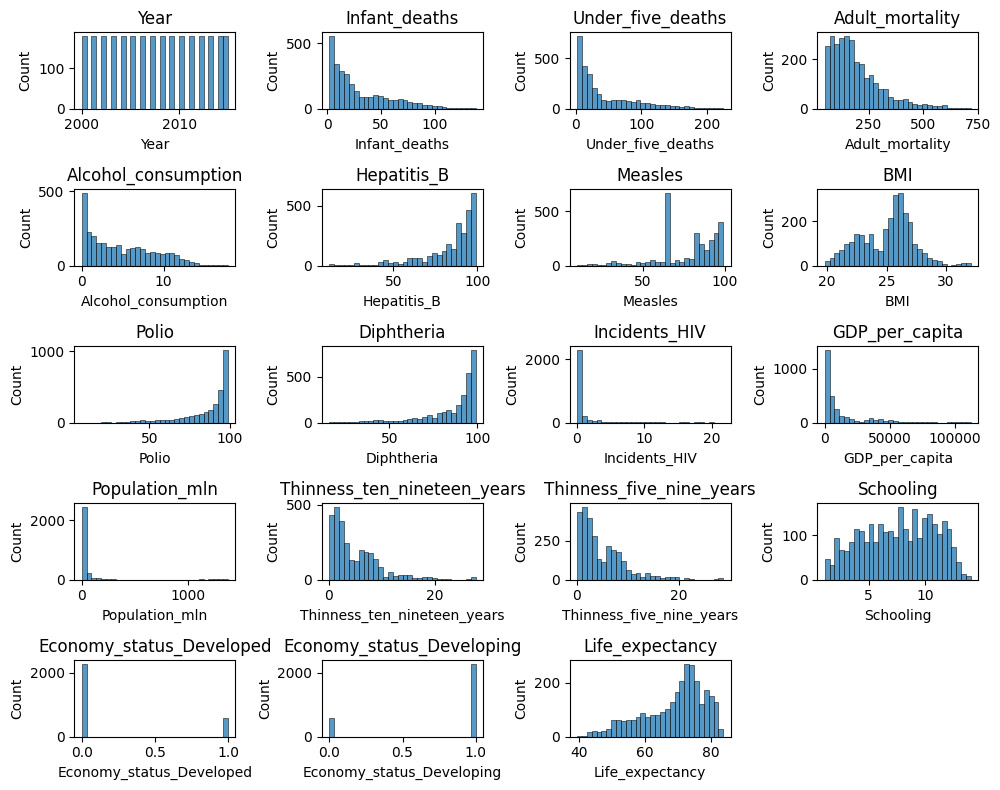

In [ ]:
#<Haleh>Hist
cols = df.select_dtypes("number").columns

fig = plt.figure(figsize=(10, 8))
c = 1
for col in cols:
    plt.subplot(5, 4, c)
    # Replace kdeplot with histplot
    g = sns.histplot(data=df, x=col, bins=30, kde=False)  # Adjust bins as needed
    plt.title(col)  # Optional: Add a title for each subplot
    c = c + 1

plt.tight_layout()
plt.show()

<Axes: >

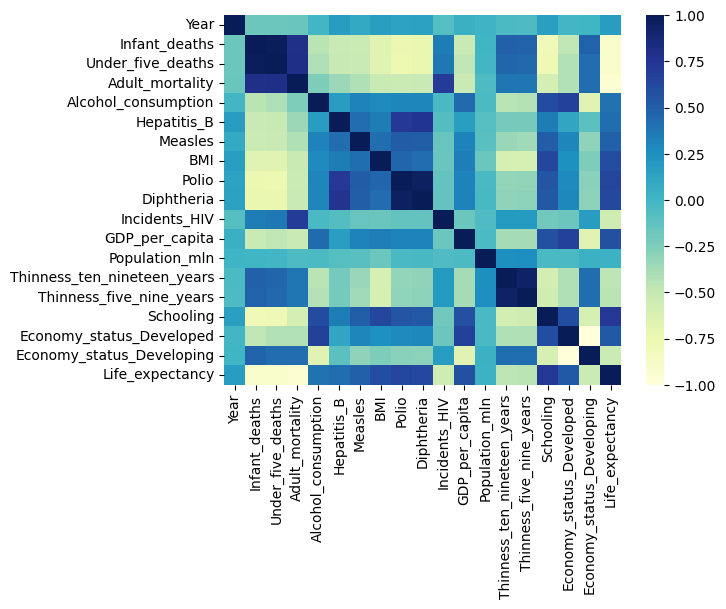

In [ ]:
#<Haleh> corr
x_corr = df.drop(columns = ['Country','Region'])
sns.heatmap(x_corr.corr(),cmap = 'YlGnBu')

In [ ]:
#<Haleh> corr life expectancy vs other
x_corr.corr()['Life_expectancy'].sort_values(ascending=False)

,Life_expectancy
Life_expectancy,1.000000
Schooling,0.732484
Polio,0.641217
Diphtheria,0.627541
BMI,0.598423
GDP_per_capita,0.583090
Economy_status_Developed,0.523791
Measles,0.490019
Hepatitis_B,0.417804
Alcohol_consumption,0.399159


#<Denise>

## Correlation Interpretation
The correlations between life expectancy and other variables in the dataset, sorted in descending order, provide insights into the factors that are most strongly associated with life expectancy. Here’s a detailed summary of the results:
### Positive Correlations

1. Schooling (0.732):
    Education level is strongly positively correlated with life expectancy, indicating that higher levels of schooling are associated with longer life spans.

2. Polio (0.641) and Diphtheria (0.628):
    Immunization coverage for diseases like polio and diphtheria is also positively correlated with life expectancy. Higher immunization rates contribute to better health outcomes and longer life expectancy.

3. BMI (0.598):
    Body Mass Index (BMI) shows a moderate positive correlation. This might indicate that healthier BMI ranges are associated with longer life expectancy, though it's important to consider that both very low and very high BMI can be detrimental.

4. GDP per Capita (0.583):
    Economic wealth, as measured by GDP per capita, is moderately positively correlated with life expectancy. Wealthier countries tend to have better healthcare systems and living conditions.

5. Developed Economy Status (0.524):
    Countries classified as developed show a moderate positive correlation with life expectancy, reflecting better health infrastructure and higher standards of living.

6. Measles Immunization (0.490) and Hepatitis B Immunization (0.418):
    These immunization rates are positively correlated, again emphasizing the role of vaccinations in improving health outcomes.

7. Alcohol Consumption (0.399):
    Moderate alcohol consumption might be positively correlated due to cultural or lifestyle factors in certain regions, though this is a complex relationship that can vary greatly.

### Weak Positive Correlations

1. Year (0.174):
    This weak positive correlation suggests a general improvement in life expectancy over time.

2. Population (0.026):
    The weak correlation with population size indicates that other factors have more direct impacts on life expectancy.

### Negative Correlations

1. Thinness (Ages 5-9: -0.458, Ages 10-19: -0.468):
    Higher rates of thinness (underweight) among children and adolescents are negatively correlated with life expectancy, reflecting poor nutrition and health.

2. Developing Economy Status (-0.524):
    Countries classified as developing show a moderate negative correlation with life expectancy, reflecting poorer health infrastructure and lower standards of living.

3. Incidents of HIV (-0.553):
    Higher rates of HIV incidence are negatively correlated with life expectancy, indicating the significant health impact of HIV/AIDS.

4. Infant Deaths (-0.920) and Under-Five Deaths (-0.920):
    These strong negative correlations highlight the critical impact of early childhood mortality on overall life expectancy.

5. Adult Mortality (-0.945):
    Adult mortality shows the strongest negative correlation, underscoring the importance of reducing adult mortality to improve life expectancy.

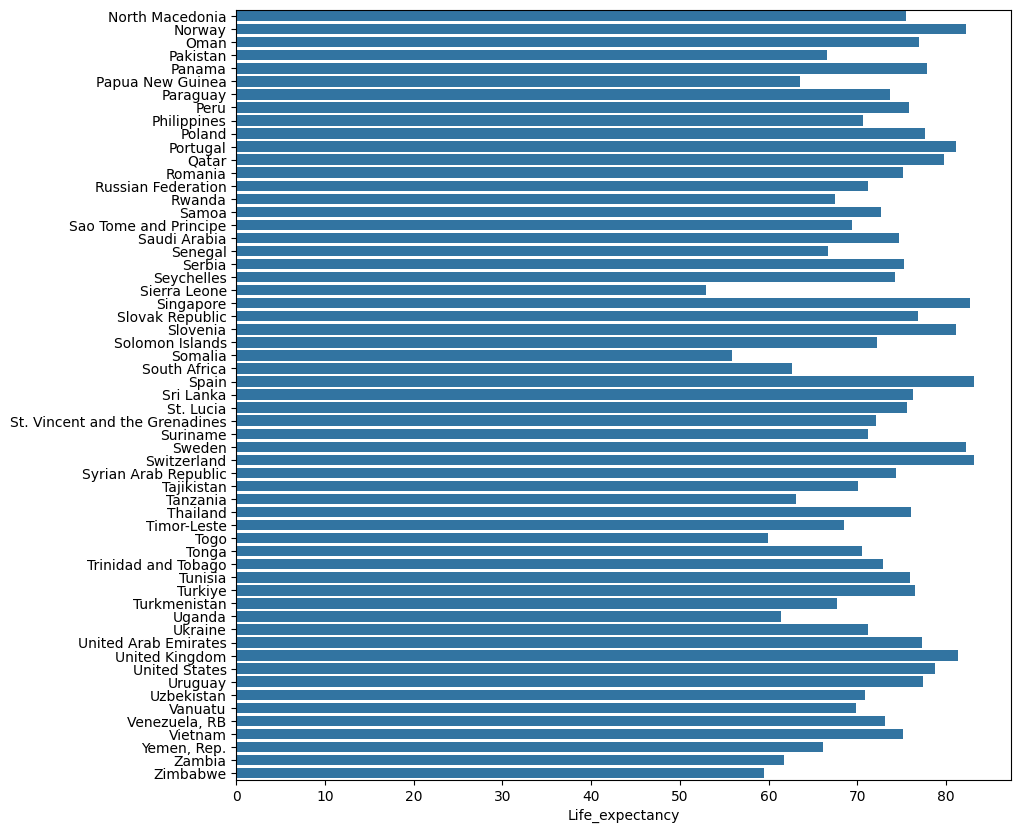

In [ ]:
#<Haleh> diff country vs GDP
plt.figure(figsize=(10, 10), dpi=100)
sns.barplot(y=df.sort_values(by='Country')['Country'].unique()[120:179], x=df.groupby('Country')['Life_expectancy'].max()[120:179]);

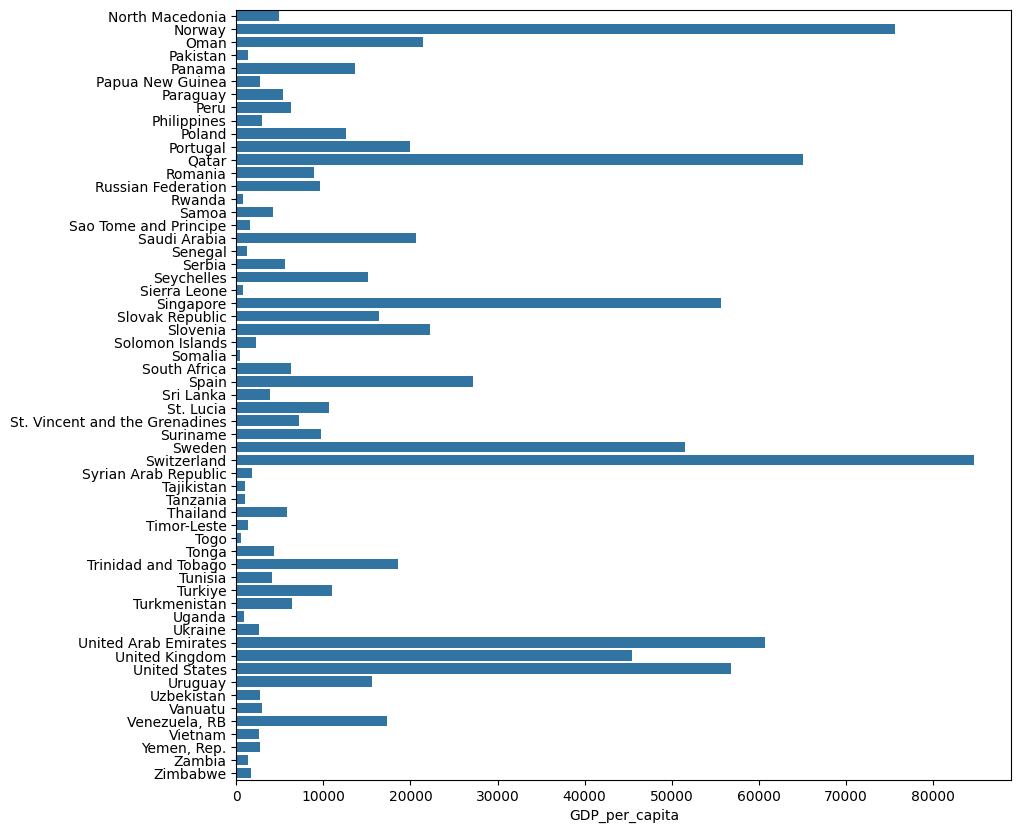

In [ ]:
#<Haleh> diff country vs GDP
plt.figure(figsize=(10, 10), dpi=100)
sns.barplot(y=df.sort_values(by='Country')['Country'].unique()[120:179], x=df.groupby('Country')['GDP_per_capita'].max()[120:179]);

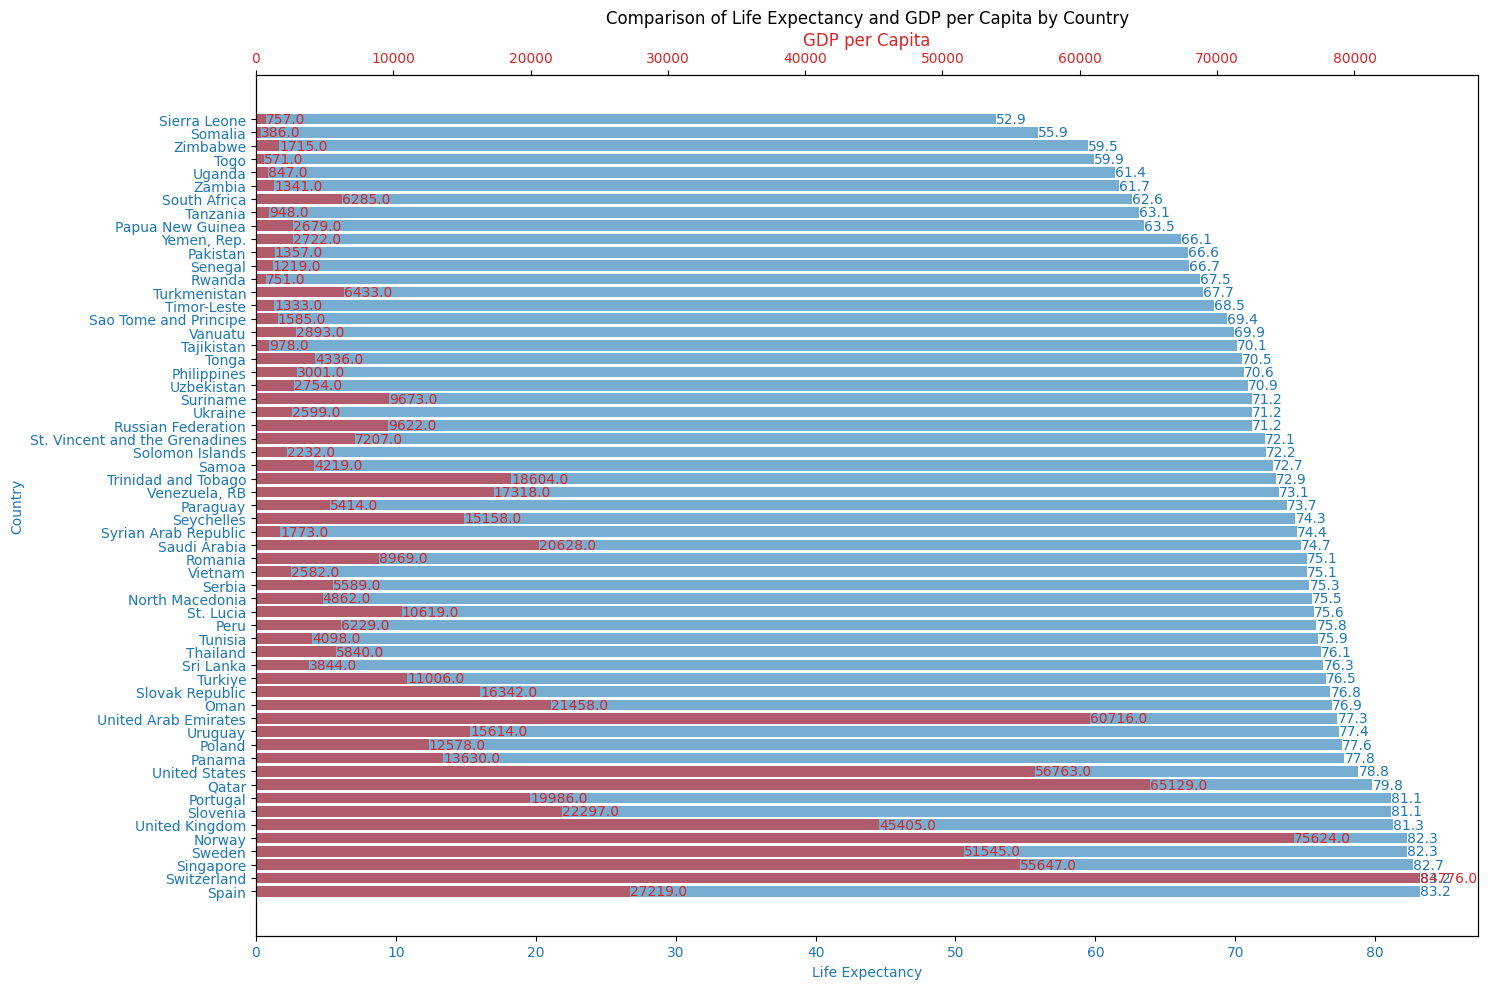

In [ ]:
# Erwin - Plotting the GDP and Life expectancy in 1 graph (overlayed) and sorted by life expectancy

subset_countries = df.sort_values(by='Country')['Country'].unique()[120:179]
subset_data = df[df['Country'].isin(subset_countries)]

sub_max_life_expect = subset_data.groupby('Country')['Life_expectancy'].max().reset_index()

subset_max_gdp = subset_data.groupby('Country')['GDP_per_capita'].max().reset_index()

merged_subset = pd.merge(sub_max_life_expect,
                         subset_max_gdp, on='Country')
sorted_subset = merged_subset.sort_values(by='Life_expectancy')

fig, ax1 = plt.subplots(figsize=(15, 10), dpi=100)

# Life Expectancy
color = 'tab:blue'
ax1.set_xlabel('Life Expectancy',color=color)
ax1.set_ylabel('Country', color=color)
ax1.barh(sorted_subset['Country'], sorted_subset['Life_expectancy'],
         color=color, alpha=0.6, label='Life Expectancy')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelcolor=color)
ax1.invert_yaxis()

# data labels for Life Expectancy
for index, value in enumerate(sorted_subset['Life_expectancy']):
    ax1.text(value, index, f'{value:.1f}', color=color, ha="left", va="center")

# second y-axis to plot GDP per Capita
ax2 = ax1.twiny()
color = 'tab:red'
ax2.set_xlabel('GDP per Capita', color=color, fontsize =12)
ax2.barh(sorted_subset['Country'], sorted_subset['GDP_per_capita'],
         color=color, alpha=0.6, label='GDP per Capita')
ax2.tick_params(axis='x', labelcolor=color)

# data labels for GDP per Capita
for index, value in enumerate(sorted_subset['GDP_per_capita']):
    ax2.text(value, index, f'{value:.1f}', color=color, ha="left", va="center")

plt.title('Comparison of Life Expectancy and GDP per Capita by Country')
fig.tight_layout()
plt.show()

#<Denise>
#Bar plot interpretation
The bar plot illustrates the GDP per capita for a subset of countries, sorted alphabetically from the 121st to the 179th country in the dataset. Here’s a detailed interpretation of the results:

- Variation in GDP per Capita: There is a significant variation in GDP per capita among the selected countries. Some countries have very high GDP per capita, while others have much lower values.

- High GDP per Capita Countries: Countries like Norway, Qatar, and Singapore stand out with notably high GDP per capita. These countries are known for their strong economies and high standards of living.

- Low GDP per Capita Countries: On the other end of the spectrum, countries such as Tajikistan, Uganda, and Zimbabwe have much lower GDP per capita, reflecting their developing economic status.

- Middle Range Countries: There are several countries with GDP per capita in the middle range, indicating a moderate level of economic development. Examples include Thailand, Tunisia, and Uruguay.

- Economic Diversity: The plot showcases the economic diversity among countries, even within a subset. This diversity can be attributed to various factors such as natural resources, industrial development, political stability, and economic policies.

This plot provides a clear visual representation of economic disparities among countries. It highlights the need for targeted economic policies to address these disparities and promote more equitable economic growth.

[Text(0, 0, 'Middle East'),
 Text(1, 0, 'European Union'),
 Text(2, 0, 'Asia'),
 Text(3, 0, 'South America'),
 Text(4, 0, 'Central America and Caribbean'),
 Text(5, 0, 'Rest of Europe'),
 Text(6, 0, 'Africa'),
 Text(7, 0, 'Oceania'),
 Text(8, 0, 'North America')]

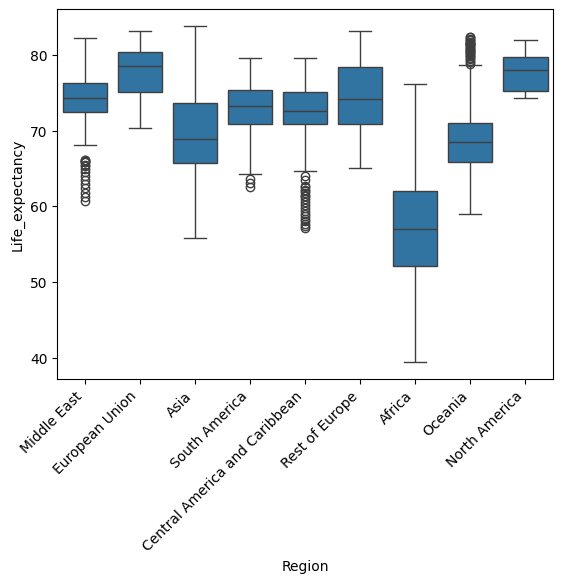

In [ ]:
# Daniela - Comparing life expectancy between regions
my_plot = sns.boxplot(x='Region', y='Life_expectancy', data=df)
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45, horizontalalignment='right')


<Axes: xlabel='Year', ylabel='Life_expectancy'>

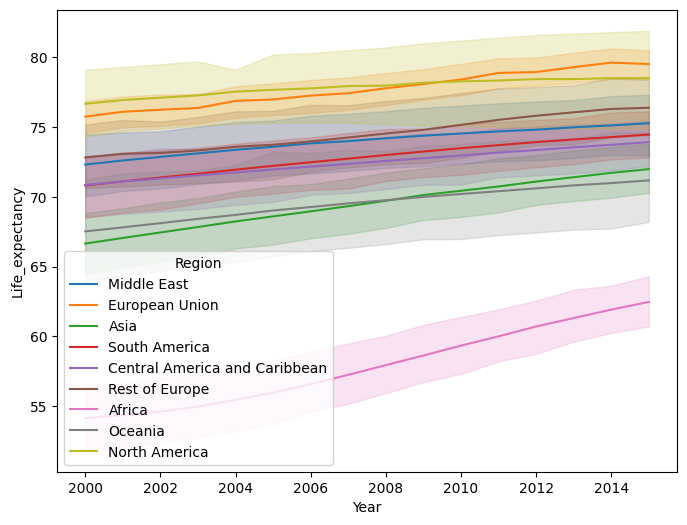

In [ ]:
#<Haleh> life expectency trend from 2000 to 2015
plt.figure(figsize = (8,6))
sns.lineplot(df,x = 'Year', y = 'Life_expectancy',hue = 'Region')

<Axes: >

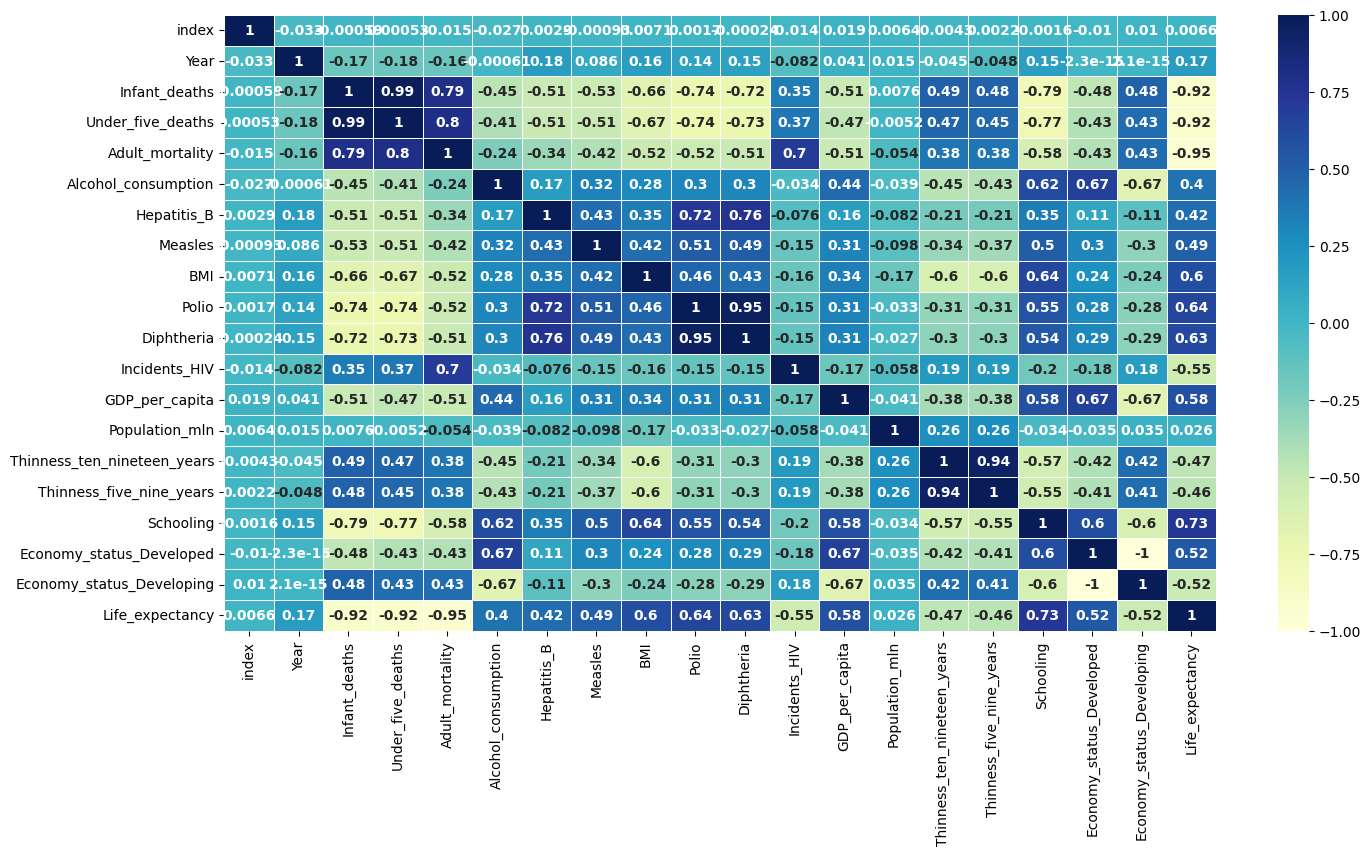

In [ ]:
# frank - recreate the correlation matrix with embedded values for ease of navigating relations
dfa=df.sort_values(by='Year')
dfa=dfa.reset_index()

corr = dfa.corr(numeric_only=True)

fig = plt.figure(figsize=(16,8))
sns.heatmap(corr, annot=True, annot_kws={'weight':'bold'}, linewidths=.5, cmap = 'YlGnBu')

#<Denise>

## Line plot interpretation
The line plot illustrates the trends in life expectancy over the years, segmented by region. Here are the key observations from the plot:

- General Upward Trend: Most regions show an upward trend in life expectancy over the years, indicating improvements in health outcomes globally.

- Regional Differences: There are clear differences in the levels of life expectancy across regions. For instance, regions such as the European Union and some parts of the Middle East consistently have higher life expectancy compared to regions like Africa.

- Rate of Increase: The rate of increase in life expectancy varies by region. Some regions show a steeper increase, indicating rapid improvements, while others have a more gradual rise.

- Stagnation or Decline: A few regions show periods of stagnation or even decline in life expectancy, highlighting potential health crises or other adverse factors during certain periods.

- Recent Trends: In the most recent years, there seems to be a convergence where the gaps between regions are narrowing, suggesting a global improvement in life expectancy, although disparities still exist.

This plot underscores the importance of looking at temporal trends and regional contexts when analyzing health outcomes. It also suggests that while global health is improving, targeted efforts are still needed to address regional disparities.

Life expectancy increased throughout the years. Also region with the lowest life expectancy is Africa.

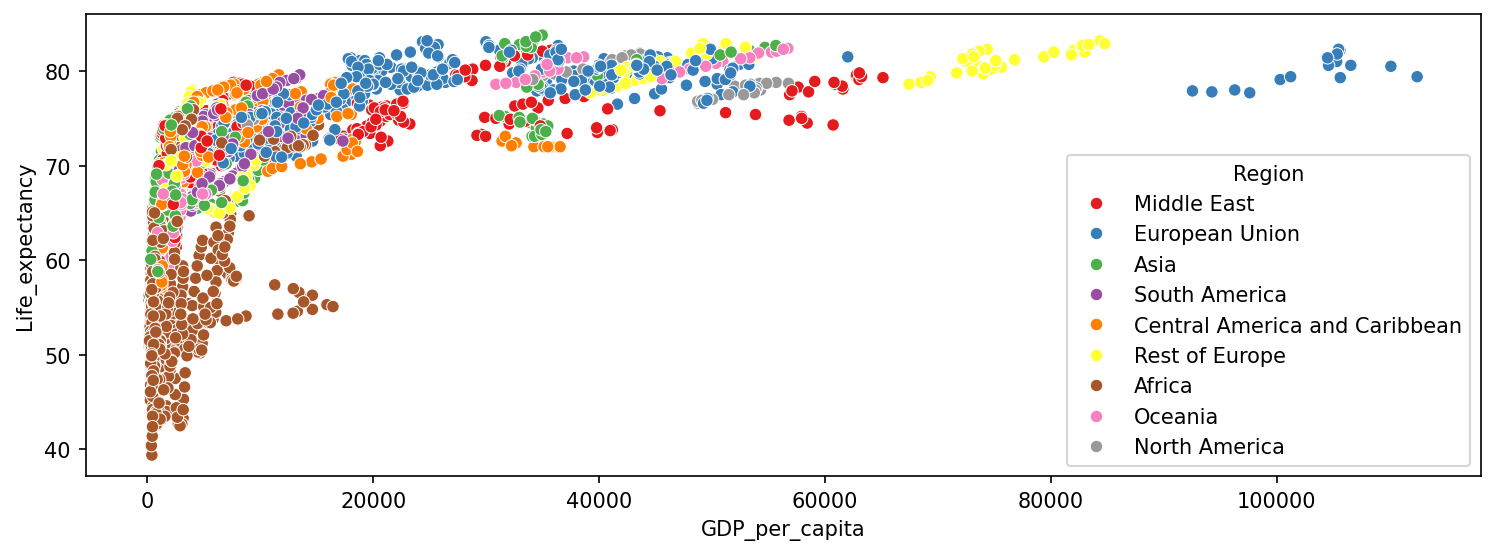

In [ ]:
#<Haleh>
plt.figure(figsize=(12, 4), dpi=150)
sns.scatterplot(x=df['GDP_per_capita'], y=df['Life_expectancy'], hue=df['Region'], palette='Set1');

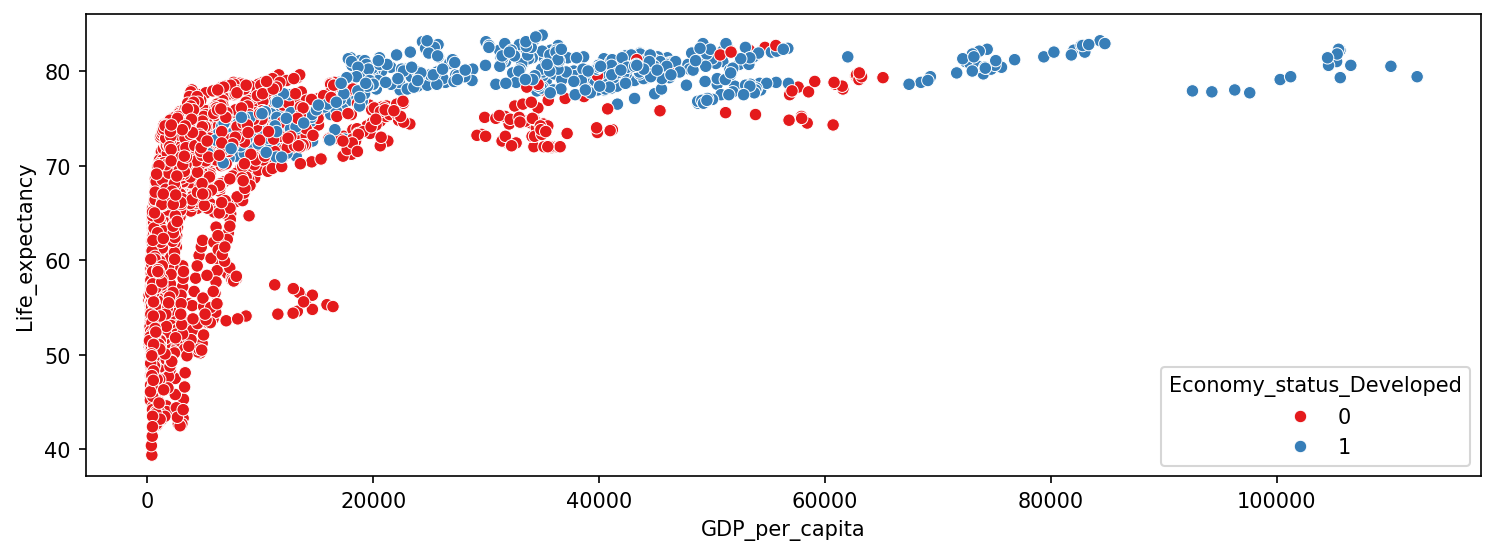

In [ ]:
#<Daniela>
plt.figure(figsize=(12, 4), dpi=150)
sns.scatterplot(x=df['GDP_per_capita'], y=df['Life_expectancy'], hue=df['Economy_status_Developed'], palette='Set1');

,Life_expectancy,GDP_per_capita
Life_expectancy,1.00000,0.58309
GDP_per_capita,0.58309,1.00000


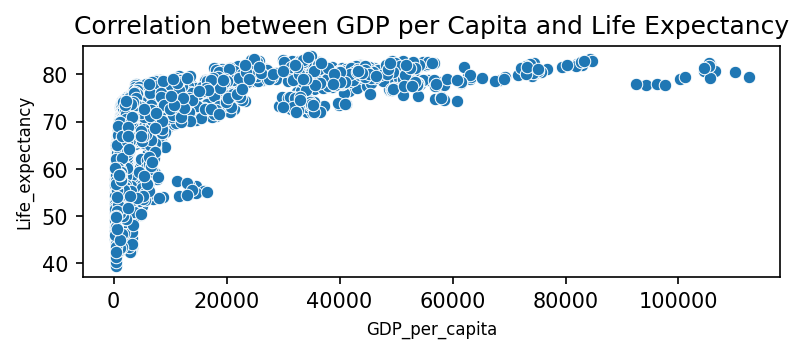

In [ ]:
#<Haleh> GDP vs life expectency
#Average life expectancy versus gross domestic product per capita.
#It is well known that life expectancy at birth (e0) is higher in wealthy countries. This is supported by this Figure.
plt.figure(figsize=(6, 2), dpi=150)
plt.title("Correlation between GDP per Capita and Life Expectancy")
plt.xlabel("GDP_per_capita",fontsize=8)
plt.ylabel("Life_expectancy",fontsize=8)
sns.scatterplot(x=df['GDP_per_capita'], y=df['Life_expectancy'], palette='Set1');
pd.DataFrame(data=x_corr, columns=['Life_expectancy', 'GDP_per_capita']).corr()

<Axes: xlabel='GDP_per_capita', ylabel='Count'>

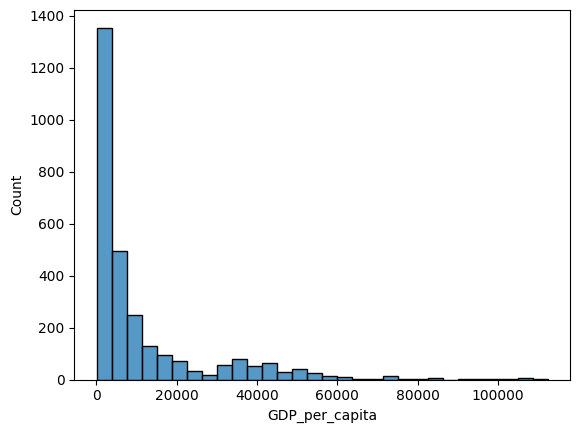

In [ ]:
# Check if GDP_per_capita is normally distibuted
sns.histplot(data=df, x='GDP_per_capita', bins=30, kde=False)

<Axes: xlabel='Life_expectancy', ylabel='Count'>

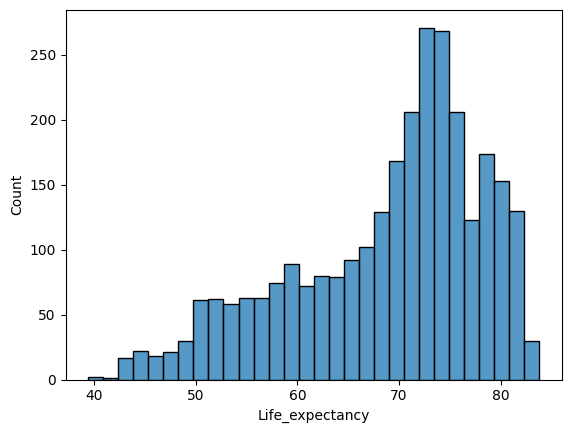

In [ ]:
# Check if Life_expectancy is normally distibuted
sns.histplot(data=df, x='Life_expectancy', bins=30, kde=False)

In [ ]:
#<Daniela> Life_expectancy transformation

df['Life_expectancy_fitted_data'],lambda_value = scipy.stats.boxcox(df['Life_expectancy'])
print(lambda_value)

3.4893844550506423


<Axes: xlabel='Life_expectancy_fitted_data', ylabel='Count'>

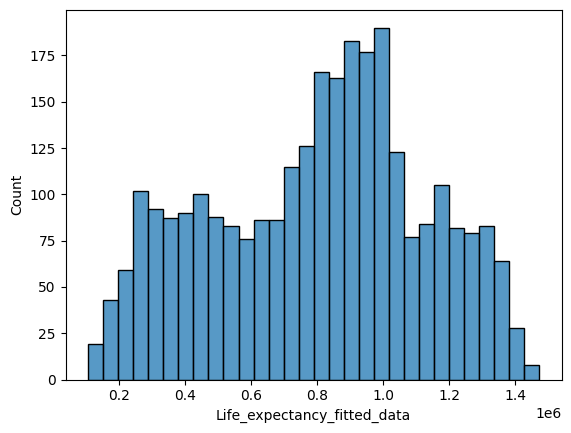

In [ ]:
# Check if Life_expectancy is normally distibuted
sns.histplot(data=df, x='Life_expectancy_fitted_data', bins=30, kde=False)

In [ ]:
df["Life_expectancy_log"] = np.log10(df["Life_expectancy"])

<Axes: xlabel='Life_expectancy_log', ylabel='Count'>

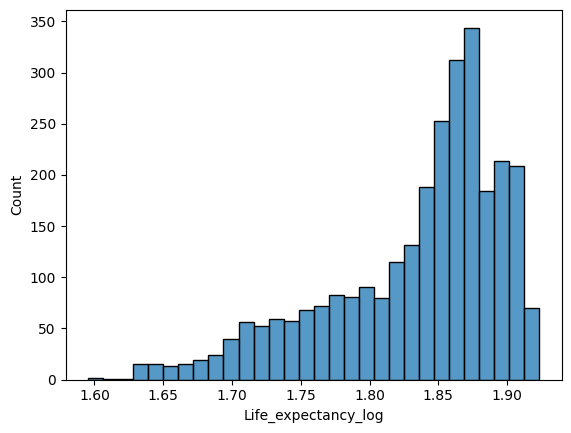

In [ ]:
# Check if Life_expectancy is normally distibuted
sns.histplot(data=df, x='Life_expectancy_log', bins=30, kde=False)

The linear model is not appropriate. Data transformation will be applied.

#<Denise>
## Scatter plot interpretation
The scatter plot shows the relationship between GDP per capita and life expectancy, with data points colored by region. Here are the key observations from the plot:

- Regional Clusters: There are distinct clusters based on regions. For example, countries in the European Union and some from the Middle East show higher GDP per capita and life expectancy, while regions such as Africa have lower values for both metrics.

- Positive Correlation Across Regions: Across all regions, there is a general trend where higher GDP per capita is associated with higher life expectancy. This trend is more pronounced in certain regions like the European Union.

- Variation Within Regions: Within each region, there is variability. For instance, in the Middle East and Asia, some countries have relatively high GDP per capita but varying life expectancy levels.

- Outliers: There are some outliers where countries have either a very high GDP per capita but relatively lower life expectancy or vice versa.

This plot highlights the importance of considering regional contexts when analyzing the relationship between economic indicators and health outcomes. It also suggests that while GDP per capita is an important factor, other regional factors and policies likely play significant roles in determining life expectancy.

# SECTION 2: Check Correlation + Multicollinearity of Predictor Variables

In [ ]:
#Daniela - Paired test instead of two-sample t-test

t_stat, p_value = stats.ttest_rel(df['GDP_per_capita'], df['Life_expectancy'])
print(f"\nT-test: t-statistic = {t_stat}, p-value = {p_value}")


T-test: t-statistic = 36.265117421014146, p-value = 2.6545384236049906e-237


Daniela:
The p-value in the two-sample t-test approach is 0,00% is equal to the paired differences test.
By testing the paired differences between each individual in the population instead of the difference between the two populations, we removed the inter-subject variability.

Both results reject the null hypothesis.

-0.03729287954585521


<Axes: xlabel='GDP_per_capita_bc', ylabel='Life_expectancy'>

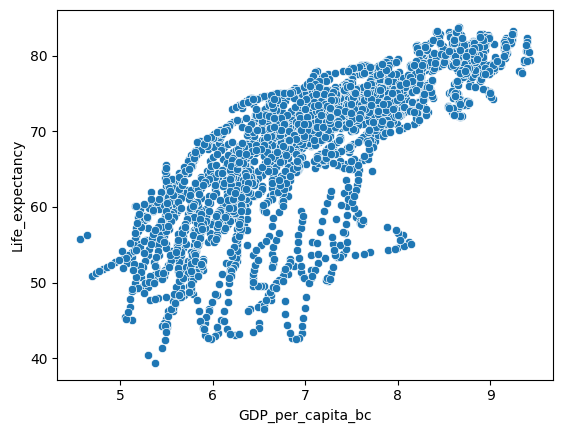

In [ ]:
#<Haleh> GDP transformation

df['GDP_per_capita_bc'],lambda_value = scipy.stats.boxcox(df['GDP_per_capita'])
print(lambda_value)
sns.scatterplot(df, y = 'Life_expectancy', x = 'GDP_per_capita_bc')

<Axes: xlabel='GDP_per_capita_bc', ylabel='Count'>

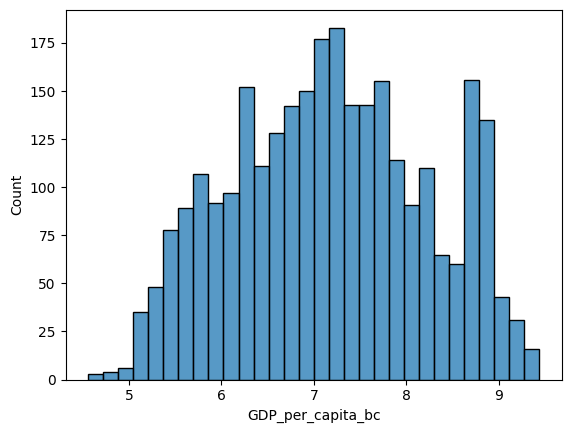

In [ ]:
# Daniela - Check if GDP_per_capita_log is nearly normal distibuted
sns.histplot(data=df, x='GDP_per_capita_bc', bins=30, kde=False)

In [ ]:
#Daniela - create Arrays for ANOVA test for region
life_expectancy_EU = df[df["Region"].isin(['European Union'])].Life_expectancy
life_expectancy_NA = df[df["Region"].isin(['North America'])].Life_expectancy
life_expectancy_ME = df[df["Region"].isin(['Middle East'])].Life_expectancy
life_expectancy_Asia = df[df["Region"].isin(['Asia'])].Life_expectancy
life_expectancy_SA = df[df["Region"].isin(['South America'])].Life_expectancy
life_expectancy_CAC = df[df["Region"].isin(['Central America and Caribbean'])].Life_expectancy
life_expectancy_RoE = df[df["Region"].isin(['Rest of Europe'])].Life_expectancy
life_expectancy_Africa = df[df["Region"].isin(['Africa'])].Life_expectancy
life_expectancy_OC = df[df["Region"].isin(['Oceania'])].Life_expectancy

In [ ]:
#Daniela ANOVA test for region
stats.f_oneway(life_expectancy_EU, life_expectancy_NA, life_expectancy_ME, life_expectancy_SA, life_expectancy_Asia, life_expectancy_CAC, life_expectancy_RoE, life_expectancy_Africa, life_expectancy_OC)

F_onewayResult(statistic=585.3498593161612, pvalue=0.0)

In [ ]:
#Daniela ANOVA test for region
df1 = pd.DataFrame(life_expectancy_EU, columns=['Life_expectancy']); df1['Group']=1
df2 = pd.DataFrame(life_expectancy_NA, columns=['Life_expectancy']); df2['Group']=2
df3 = pd.DataFrame(life_expectancy_ME, columns=['Life_expectancy']); df3['Group']=3
df4 = pd.DataFrame(life_expectancy_Asia, columns=['Life_expectancy']); df4['Group']=4
df5 = pd.DataFrame(life_expectancy_SA, columns=['Life_expectancy']); df5['Group']=5
df6 = pd.DataFrame(life_expectancy_CAC, columns=['Life_expectancy']); df6['Group']=6
df7 = pd.DataFrame(life_expectancy_RoE, columns=['Life_expectancy']); df7['Group']=7
df8 = pd.DataFrame(life_expectancy_Africa, columns=['Life_expectancy']); df8['Group']=8
df9 = pd.DataFrame(life_expectancy_OC, columns=['Life_expectancy']); df9['Group']=9
df_anova= pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9])

In [ ]:
comparisons = mc.MultiComparison(df_anova['Life_expectancy'], df_anova['Group'])
table, arr1, arr2 = comparisons.allpairtest(stats.ttest_ind, method='bonf')

table

group1,group2,stat,pval,pval_corr,reject
1,2,-0.2628,0.7929,1.0,False
1,3,12.7533,0.0,0.0,True
1,4,26.6285,0.0,0.0,True
1,5,17.0541,0.0,0.0,True
1,6,18.6555,0.0,0.0,True
1,7,10.3828,0.0,0.0,True
1,8,48.7362,0.0,0.0,True
1,9,21.5883,0.0,0.0,True
2,3,6.2782,0.0,0.0,True
2,4,10.3082,0.0,0.0,True


<Axes: xlabel='Economy_status_Developed', ylabel='Life_expectancy'>

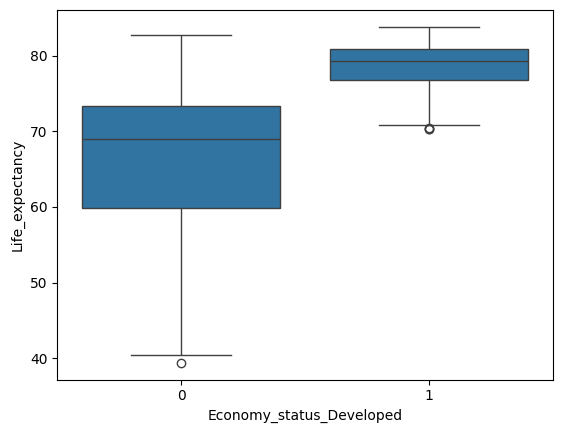

In [ ]:
# Daniela - Comparing life expectancy between developed and developing countries
sns.boxplot(x='Economy_status_Developed', y='Life_expectancy', data=df)

In [ ]:
# Daniela - Anova test for ecomonical status of countries
life_expectancy_Countries_developed = df[df["Economy_status_Developed"]==1].Life_expectancy
life_expectancy_Countries_developing = df[df["Economy_status_Developing"]==1].Life_expectancy

In [ ]:
stats.f_oneway(life_expectancy_Countries_developed, life_expectancy_Countries_developing)

F_onewayResult(statistic=1082.0881509799215, pvalue=1.4081397446917954e-201)

In [ ]:
df1 = pd.DataFrame(life_expectancy_Countries_developed, columns=['Life_expectancy']); df1['Group']=1
df2 = pd.DataFrame(life_expectancy_Countries_developing, columns=['Life_expectancy']); df2['Group']=2

df_anova_dev= pd.concat([df1, df2])

In [ ]:
comparisons = mc.MultiComparison(df_anova_dev['Life_expectancy'], df_anova_dev['Group'])
table, arr1, arr2 = comparisons.allpairtest(stats.ttest_ind, method='bonf')

table

group1,group2,stat,pval,pval_corr,reject
1,2,32.8951,0.0,0.0,True


                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     5041.
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:19:08   Log-Likelihood:                -9027.9
No. Observations:                2864   AIC:                         1.806e+04
Df Residuals:                    2862   BIC:                         1.807e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            17.6791      0.72

Text(0, 0.5, 'y')

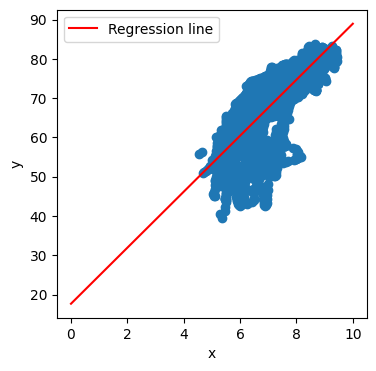

In [ ]:
#Daniela - OLS for boxcox-transformed data
reg_bc= smf.ols('Life_expectancy ~ GDP_per_capita_bc', data=df).fit()
print(reg_bc.summary())

plt.figure(figsize=(4, 4), dpi=100)
t = np.linspace(0, 10, 100)
plt.scatter(x=df['GDP_per_capita_bc'], y=df["Life_expectancy"])
plt.plot(t, reg_bc.params[0] + reg_bc.params[1] * t, 'r-', label='Regression line')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

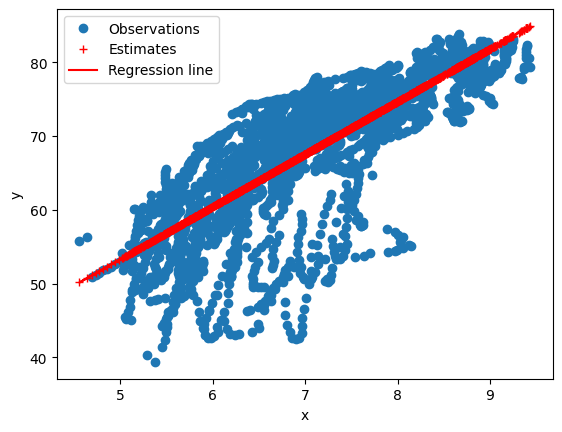

In [ ]:
#Daniela - print Estimates and Regression line
df['y_est'] = reg_bc.params[0] + reg_bc.params[1] * df["GDP_per_capita_bc"]
plt.plot(df["GDP_per_capita_bc"], df["Life_expectancy"], 'o', label = 'Observations')
plt.plot(df["GDP_per_capita_bc"], df.y_est, 'r+', label='Estimates')
plt.plot(df["GDP_per_capita_bc"], df.y_est, 'r-', label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
#Daniela - OLS for original GDP_per_capita data (not normalized) - seems to be better in terms of skewness and kurtosis
reg= smf.ols('Life_expectancy ~ GDP_per_capita', data=df).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     1474.
Date:                Sun, 11 Aug 2024   Prob (F-statistic):          1.52e-260
Time:                        15:19:09   Log-Likelihood:                -9887.4
No. Observations:                2864   AIC:                         1.978e+04
Df Residuals:                    2862   BIC:                         1.979e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         65.1186      0.173    376.

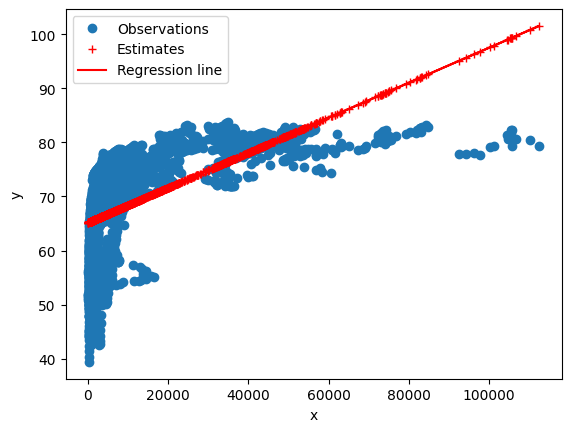

In [ ]:
#Daniela - print Estimates and Regression line
df['y_est'] = reg.params[0] + reg.params[1] * df["GDP_per_capita"]
plt.plot(df["GDP_per_capita"], df["Life_expectancy"], 'o', label = 'Observations')
plt.plot(df["GDP_per_capita"], df.y_est, 'r+', label='Estimates')
plt.plot(df["GDP_per_capita"], df.y_est, 'r-', label='Regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
#Daniela - Trying to fix skewness by using boxcox (sqrt didn't provide a better model either)

df['bc_y'], lambda_value = stats.boxcox(df.GDP_per_capita)
lambda_value

-0.03729287954585521

In [ ]:
df['GDP_per_capita_transformed'] = np.power(df['GDP_per_capita'],-0.04)

In [ ]:
reg_transformed= smf.ols('Life_expectancy ~ GDP_per_capita_transformed', data=df).fit()
print(reg_transformed.summary())

#doesn't provide a better model!

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     5048.
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:19:10   Log-Likelihood:                -9026.6
No. Observations:                2864   AIC:                         1.806e+04
Df Residuals:                    2862   BIC:                         1.807e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

#<Denise>

## Interpretation of Results


1. Box-Cox Transformation and Lambda Value

    The Box-Cox transformation was applied to the GDP_per_capita data, and the lambda value obtained is approximately −0.037. Since this value is less than zero, the log10 transformation was used.

2. Scatter Plot

    The scatter plot shows the relationship between the log-transformed GDP per capita and life expectancy. There is a clear positive trend, indicating that higher GDP per capita (log-transformed) is associated with higher life expectancy.

3. Correlation

    The correlation between life expectancy and the log-transformed GDP per capita is 0.7960.796, which indicates a strong positive correlation. This means that as the GDP per capita increases, life expectancy tends to increase significantly.

4. Linear Regression Analysis

    The linear regression analysis results are summarized as follows:
        Intercept: 25.338
        Coefficient for GDP_per_capita_log: 11.930
        R-squared: 0.633

    The model explains approximately 63.3% of the variance in life expectancy. The F-statistic is very high (4934), and the p-value is effectively zero, indicating that the model is statistically significant.

    The positive coefficient for GDP_per_capita_log (11.930) suggests that for every unit increase in the log-transformed GDP per capita, life expectancy increases by approximately 11.93 years.

5. Regression Line Plot

    The regression line plotted on the scatter plot shows a good fit with the data points, further reinforcing the positive relationship between GDP per capita (log-transformed) and life expectancy.

Summary

The analysis demonstrates a strong positive relationship between GDP per capita and life expectancy. The log transformation of GDP per capita provides a better linear fit, and the linear regression model is statistically significant with a high R-squared value. This indicates that economic prosperity, as measured by GDP per capita, is a significant predictor of life expectancy.

In [ ]:
# Daniela - Multiple linear regression with all variable (Backward selection)

mul_reg_bc= smf.ols('Life_expectancy ~ GDP_per_capita_bc + Region + Economy_status_Developed + Schooling + Polio + Diphtheria + BMI + Measles + Hepatitis_B + Alcohol_consumption + Year + Population_mln + Thinness_five_nine_years + Thinness_ten_nineteen_years + Economy_status_Developing + Incidents_HIV', data=df).fit()
print(mul_reg_bc.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1129.
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:19:10   Log-Likelihood:                -7222.3
No. Observations:                2864   AIC:                         1.449e+04
Df Residuals:                    2841   BIC:                         1.463e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
# Daniela - Multiple linear regression (Backward selection) - Measels removed

mul_reg_bc= smf.ols('Life_expectancy ~ GDP_per_capita_bc + Region + Economy_status_Developed + Schooling + Polio + Diphtheria + BMI + Hepatitis_B + Alcohol_consumption + Year + Population_mln + Thinness_five_nine_years + Thinness_ten_nineteen_years + Economy_status_Developing + Incidents_HIV', data=df).fit()
print(mul_reg_bc.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1129.
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:19:11   Log-Likelihood:                -7222.3
No. Observations:                2864   AIC:                         1.449e+04
Df Residuals:                    2841   BIC:                         1.463e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
# Daniela - Multiple linear regression (Backward selection) - Thinness_ten_nineteen_years removed

mul_reg_bc= smf.ols('Life_expectancy ~ GDP_per_capita_bc + Region + Economy_status_Developed + Schooling + Polio + Diphtheria + BMI + Hepatitis_B + Alcohol_consumption + Year + Population_mln + Thinness_five_nine_years + Economy_status_Developing + Incidents_HIV', data=df).fit()
print(mul_reg_bc.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1129.
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:19:11   Log-Likelihood:                -7222.3
No. Observations:                2864   AIC:                         1.449e+04
Df Residuals:                    2841   BIC:                         1.463e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
# Daniela - Multiple linear regression (Backward selection) - Thinness_five_nine_years removed

mul_reg_bc= smf.ols('Life_expectancy ~ GDP_per_capita_bc + Region + Economy_status_Developed + Schooling + Polio + Diphtheria + BMI + Hepatitis_B + Alcohol_consumption + Year + Population_mln + Economy_status_Developing + Incidents_HIV', data=df).fit()
print(mul_reg_bc.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1129.
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:19:11   Log-Likelihood:                -7222.3
No. Observations:                2864   AIC:                         1.449e+04
Df Residuals:                    2841   BIC:                         1.463e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
# Daniela - Multiple linear regression (Backward selection) - Diphtheria removed

mul_reg_bc= smf.ols('Life_expectancy ~ GDP_per_capita_bc + Region + Economy_status_Developed + Schooling + Polio + BMI + Hepatitis_B + Alcohol_consumption + Year + Population_mln + Economy_status_Developing + Incidents_HIV', data=df).fit()
print(mul_reg_bc.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1129.
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:19:11   Log-Likelihood:                -7222.3
No. Observations:                2864   AIC:                         1.449e+04
Df Residuals:                    2841   BIC:                         1.463e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
# Daniela - Multiple linear regression with all variable (Backward selection) - Hepatitis_B removed

mul_reg_bc= smf.ols('Life_expectancy ~ GDP_per_capita_bc + Region + Economy_status_Developed + Schooling + Polio + BMI + Alcohol_consumption + Year + Population_mln + Economy_status_Developing + Incidents_HIV', data=df).fit()
print(mul_reg_bc.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1129.
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:19:11   Log-Likelihood:                -7222.3
No. Observations:                2864   AIC:                         1.449e+04
Df Residuals:                    2841   BIC:                         1.463e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
# Daniela - Multiple linear regression (Backward selection) - Economy_status_Developed removed

mul_reg_bc= smf.ols('Life_expectancy ~ GDP_per_capita_bc + Region + Schooling + Polio + BMI + Hepatitis_B + Alcohol_consumption + Year + Population_mln + Economy_status_Developing + Incidents_HIV', data=df).fit()
print(mul_reg_bc.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1129.
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:19:11   Log-Likelihood:                -7222.3
No. Observations:                2864   AIC:                         1.449e+04
Df Residuals:                    2841   BIC:                         1.463e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
# Daniela - Multiple linear regression (Backward selection) - Economy_status_Developing removed

mul_reg_bc= smf.ols('Life_expectancy ~ GDP_per_capita_bc + Region + Schooling + Polio + BMI + Hepatitis_B + Alcohol_consumption + Year + Population_mln + Economy_status_Developed + Incidents_HIV', data=df).fit()
print(mul_reg_bc.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1129.
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:19:12   Log-Likelihood:                -7222.3
No. Observations:                2864   AIC:                         1.449e+04
Df Residuals:                    2841   BIC:                         1.463e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
# Daniela - Multiple linear regression (Backward selection) - Population_mln, Hepatisit_B, BMI and Schooling removed

mul_reg_bc= smf.ols('Life_expectancy ~ GDP_per_capita_bc + Region + Polio + Alcohol_consumption + Year + Economy_status_Developed + Incidents_HIV', data=df).fit()
print(mul_reg_bc.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1129.
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:19:12   Log-Likelihood:                -7222.3
No. Observations:                2864   AIC:                         1.449e+04
Df Residuals:                    2841   BIC:                         1.463e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
# Daniela - Multiple linear regression (Backward selection) - Economy_status_Developed removed

mul_reg_bc= smf.ols('Life_expectancy ~  GDP_per_capita_bc + Region + Polio + Alcohol_consumption + Year + Incidents_HIV', data=df).fit()
print(mul_reg_bc.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1129.
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:19:12   Log-Likelihood:                -7222.3
No. Observations:                2864   AIC:                         1.449e+04
Df Residuals:                    2841   BIC:                         1.463e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
# Daniela - Multiple linear regression (Backward selection) - Alcohol_consumption removed

mul_reg_bc= smf.ols('Life_expectancy ~ GDP_per_capita_bc  +  Region + Polio + Year + Incidents_HIV ', data=df).fit()
print(mul_reg_bc.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1129.
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:19:12   Log-Likelihood:                -7222.3
No. Observations:                2864   AIC:                         1.449e+04
Df Residuals:                    2841   BIC:                         1.463e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
# Daniela - Multiple linear regression (Backward selection) - Year removed

mul_reg_bc= smf.ols('Life_expectancy ~  GDP_per_capita_bc + Region + Polio + Incidents_HIV ', data=df).fit()
print(mul_reg_bc.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1129.
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:19:13   Log-Likelihood:                -7222.3
No. Observations:                2864   AIC:                         1.449e+04
Df Residuals:                    2841   BIC:                         1.463e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
# Daniela - Multiple linear regression (Backward selection) - Region removed

mul_reg_bc= smf.ols('Life_expectancy ~ GDP_per_capita_bc + Polio + Incidents_HIV ', data=df).fit()
print(mul_reg_bc.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1129.
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:19:13   Log-Likelihood:                -7222.3
No. Observations:                2864   AIC:                         1.449e+04
Df Residuals:                    2841   BIC:                         1.463e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

[Text(0.5, 1.0, 'GDP per Capita by Region')]

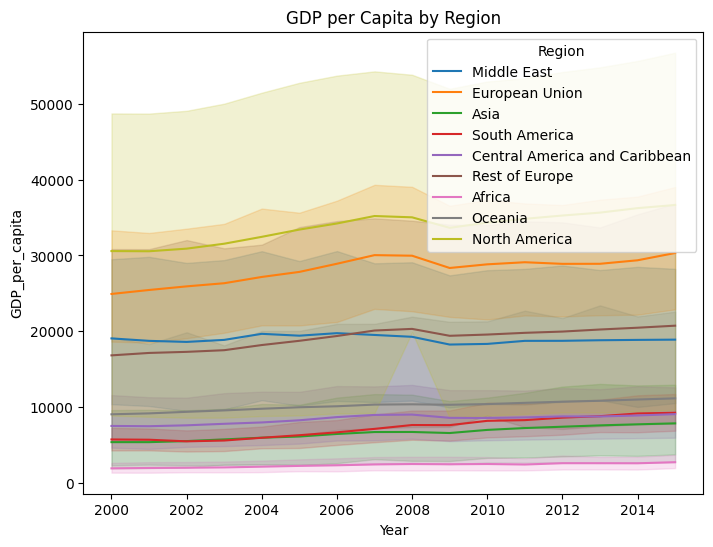

In [ ]:
# frank - initial plot of GDP over time for comparing life expectancy plot above
plt.figure(figsize = (8,6))
sns.lineplot(df,x = 'Year', y = 'GDP_per_capita',hue = 'Region').set(title="GDP per Capita by Region")

In [ ]:
# frank - group and find means for each region for each year
regional_averages_per_year = df[['Year','Region','Life_expectancy','GDP_per_capita']].groupby(['Year','Region']).mean()
regional_averages_per_year

Life_expectancy  GDP_per_capita
Year Region                                                        
2000 Africa                               54.137255     1890.784314
     Asia                                 66.648148     5351.555556
     Central America and Caribbean        70.847368     7491.421053
     European Union                       75.740741    24916.037037
     Middle East                          72.307143    19047.928571
...                                             ...             ...
2015 Middle East                          75.271429    18883.571429
     North America                        78.500000    36658.666667
     Oceania                              71.172727    11132.363636
     Rest of Europe                       76.380000    20726.533333
     South America                        74.466667     9229.500000

[144 rows x 2 columns]

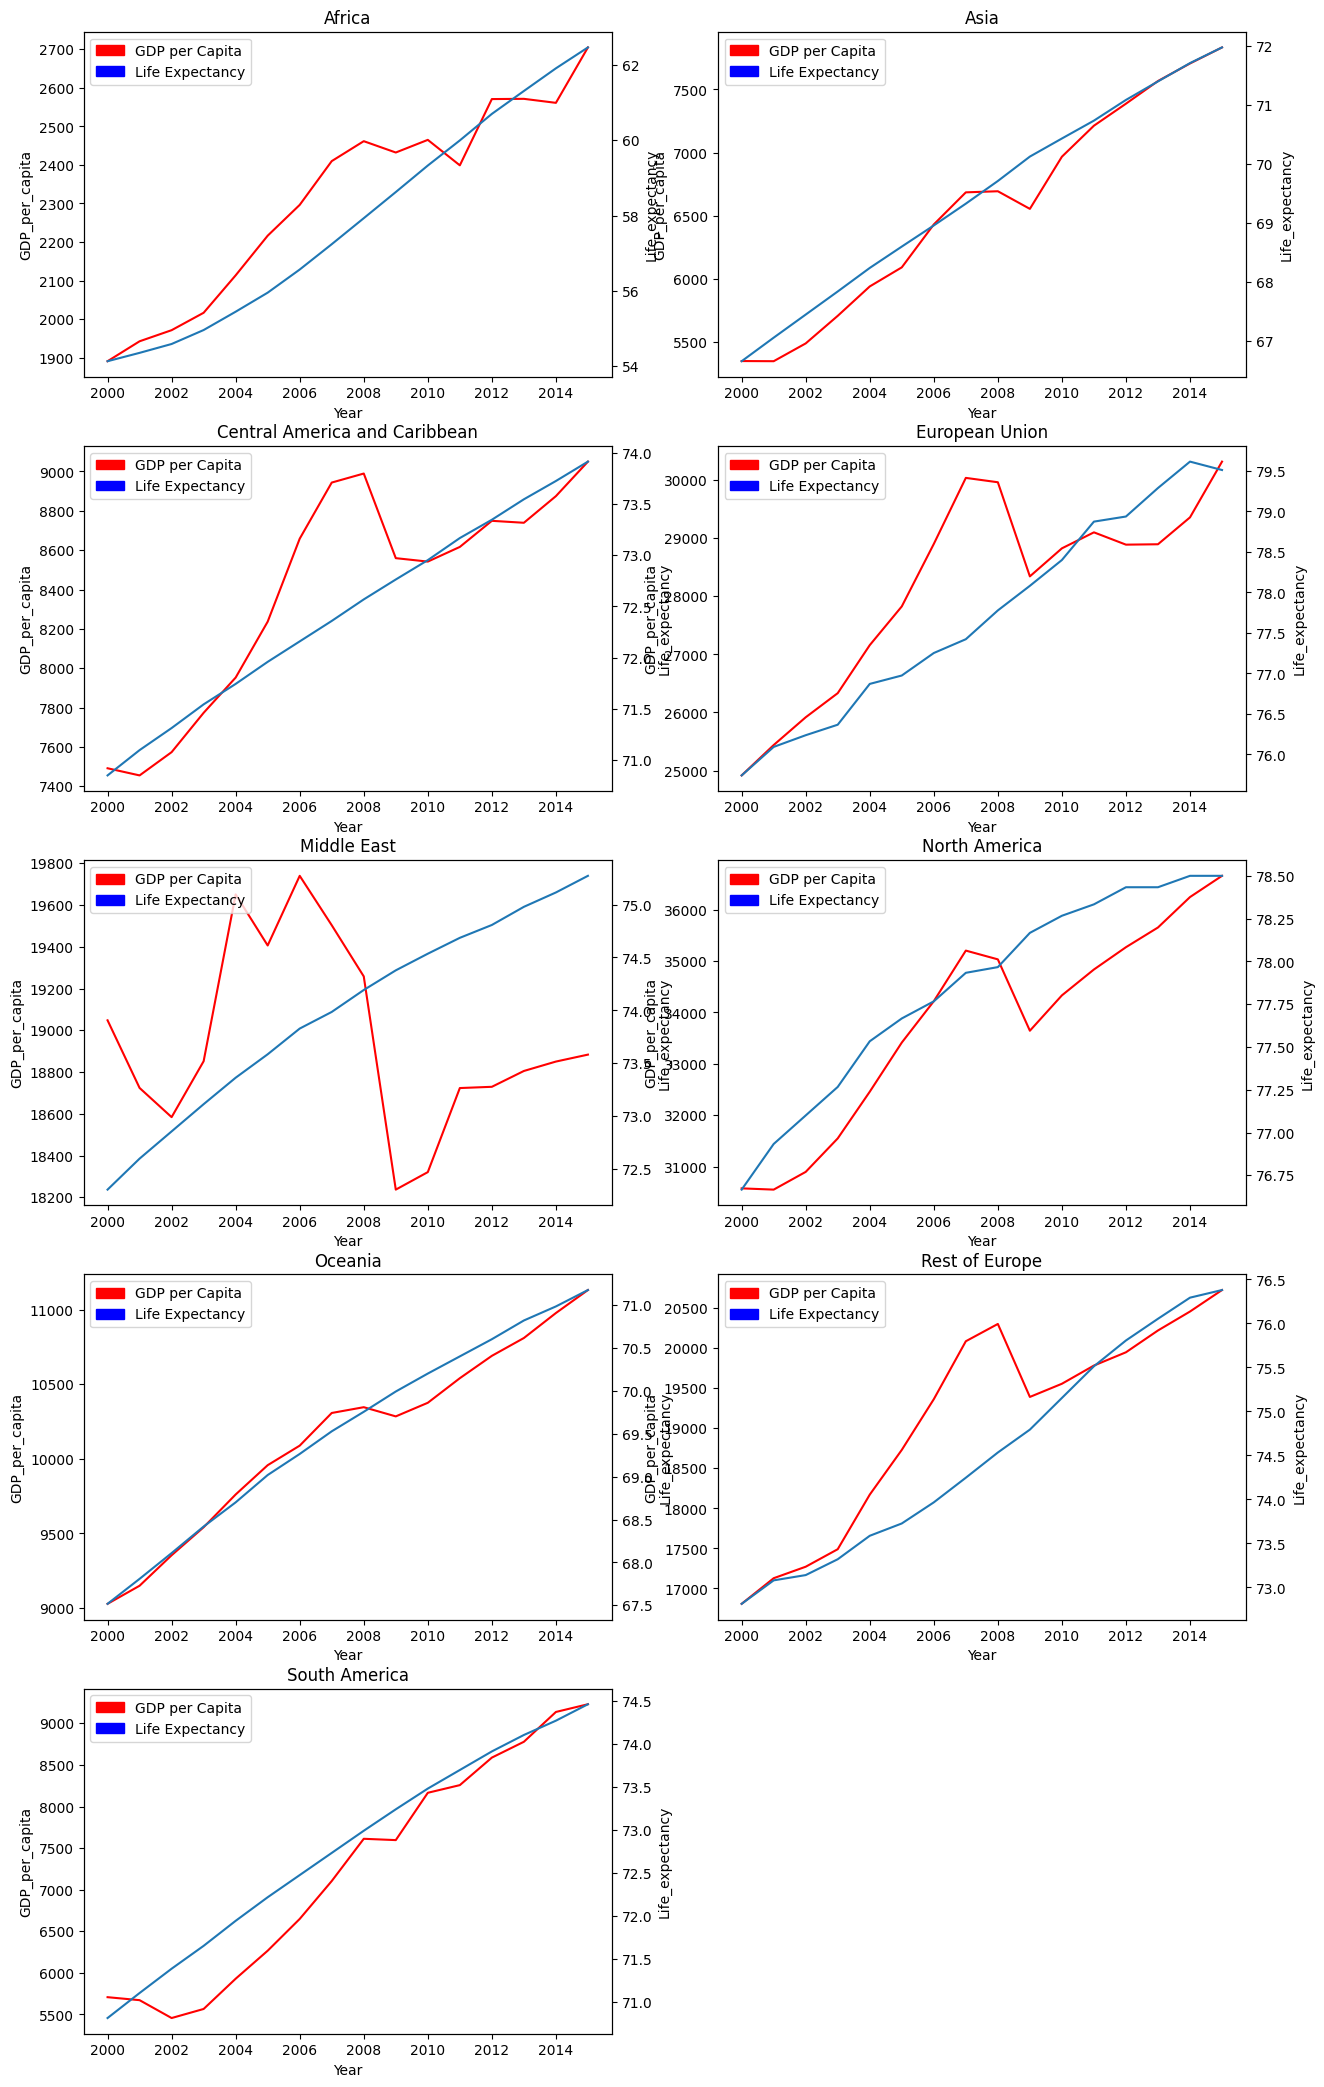

In [ ]:
# frank - regional plots comparing life expectancy and gdp over time
# need to reset group object index for iteration

rapy = regional_averages_per_year.reset_index()

redline = mpatches.Patch(color='red', label='GDP per Capita')
blueline = mpatches.Patch(color='blue', label='Life Expectancy')

fig = plt.figure(figsize = (15,26))

c=1
for region in rapy['Region'].unique():
  plt.subplot(5,2,c)
  sns.lineplot(rapy[rapy['Region'] == region],x = 'Year', y = 'GDP_per_capita',color='r').set(title=region)
  ax2 = plt.twinx()
  sns.lineplot(rapy[rapy['Region'] == region],x = 'Year', y = 'Life_expectancy', ax=ax2)
  c=c+1

  plt.legend(handles=[redline, blueline])

In [ ]:
# frank - extract the yearly averages
rapy_wwa = rapy.select_dtypes("number").groupby('Year').mean()
rapy_wwa

,Life_expectancy,GDP_per_capita
Year,,
2000,69.720797,13424.309177
2001,70.012969,13490.314478
2002,70.241332,13613.015264
2003,70.497327,13870.076998
2004,70.824749,14348.807153
2005,71.077669,14683.011629
2006,71.359604,15150.021285
2007,71.641722,15587.392981
2008,71.936635,15629.355811


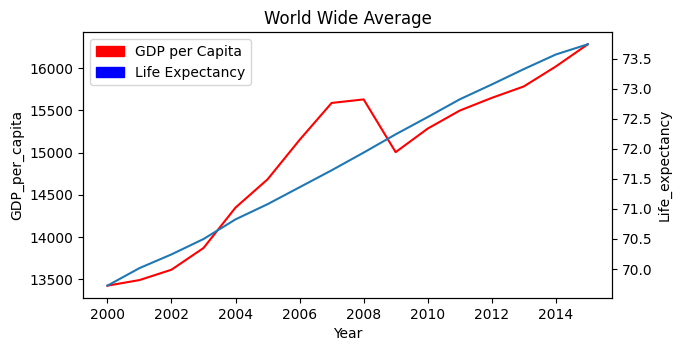

In [ ]:
# frank - plot of yearly averages
redline = mpatches.Patch(color='red', label='GDP per Capita')
blueline = mpatches.Patch(color='blue', label='Life Expectancy')

fig = plt.figure(figsize = (15,20))

plt.subplot(5,2,1)
sns.lineplot(rapy_wwa,x = 'Year', y = 'GDP_per_capita',color='r').set(title="World Wide Average")
ax2 = plt.twinx()
sns.lineplot(rapy_wwa,x = 'Year', y = 'Life_expectancy', ax=ax2)
plt.legend(handles=[redline,blueline])


In [ ]:
# frank - misc ..
#
#df[['Year','Country','Life_expectancy','GDP_per_capita']].groupby(['Year','Country'])
# df.loc[df['column_name'] == some_value]
# country_df = dfa[['Year','Country','Life_expectancy','GDP_per_capita','Population_mln','Infant_deaths','Under_five_deaths','Adult_mortality','Polio','Diphtheria','Measles',
#                   'Hepatitis_B']]
# country_df.loc[country_df['Country'] == 'Fiji'].sort_values('Year')

# fiji = country_df.corr(numeric_only=True)

# fig = plt.figure(figsize=(16,8))
# sns.heatmap(fiji, annot=True, annot_kws={'weight':'bold'}, linewidths=.5, cmap = 'YlGnBu')


In [ ]:
# frank - as was calculated earlier but not mentioned,  by haleh there is a strong negative correlation between life expectancy and the mortality rates
# this was summarized in the correlation matrix above with embedded corelations
# investigatng the correlation matrix Life_expectancy has a strong co-relation to each of the mortality rates
#
# Life_expectancy in references of the original dataset, is the life expectancy at birth (years)
#
# Infant_deaths  per 1000 population
# Under_five_deaths per 1000 population
# Adult_mortality per 1000 population
#

reg1 = smf.ols('Life_expectancy ~ Infant_deaths + Under_five_deaths + Adult_mortality', data=dfa).fit()
print(reg1.summary())
print(reg1.params)

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 3.220e+04
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:23:06   Log-Likelihood:                -5400.5
No. Observations:                2864   AIC:                         1.081e+04
Df Residuals:                    2860   BIC:                         1.083e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            82.6150      0.06

In [ ]:
# lets compare above relationsip with the hypothesis of the project
#
reg2 = smf.ols('Life_expectancy ~ GDP_per_capita', data=dfa).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     1474.
Date:                Sun, 11 Aug 2024   Prob (F-statistic):          1.52e-260
Time:                        20:06:04   Log-Likelihood:                -9887.4
No. Observations:                2864   AIC:                         1.978e+04
Df Residuals:                    2862   BIC:                         1.979e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         65.1186      0.173    376.

In [ ]:
# similar to daneila below but group based behaviour and policy
# policy would include vaccinations 'Polio','Diphtheria','Measles','Hepatitis_B'
reg3 = smf.ols('Life_expectancy ~ Polio + Diphtheria + Measles + Hepatitis_B ', data=dfa).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     611.0
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:06:41   Log-Likelihood:                -9597.7
No. Observations:                2864   AIC:                         1.921e+04
Df Residuals:                    2859   BIC:                         1.924e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      33.2274      0.798     41.659      

In [ ]:
# similar to daneila below but group based behaviour and policy
# behaviour - alcohol hiv bmi schooling/education
reg4 = smf.ols('Life_expectancy ~ Alcohol_consumption + Incidents_HIV + BMI + Schooling', data=dfa).fit()
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     1951.
Date:                Sun, 11 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:06:55   Log-Likelihood:                -8597.7
No. Observations:                2864   AIC:                         1.721e+04
Df Residuals:                    2859   BIC:                         1.724e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              36.9190    

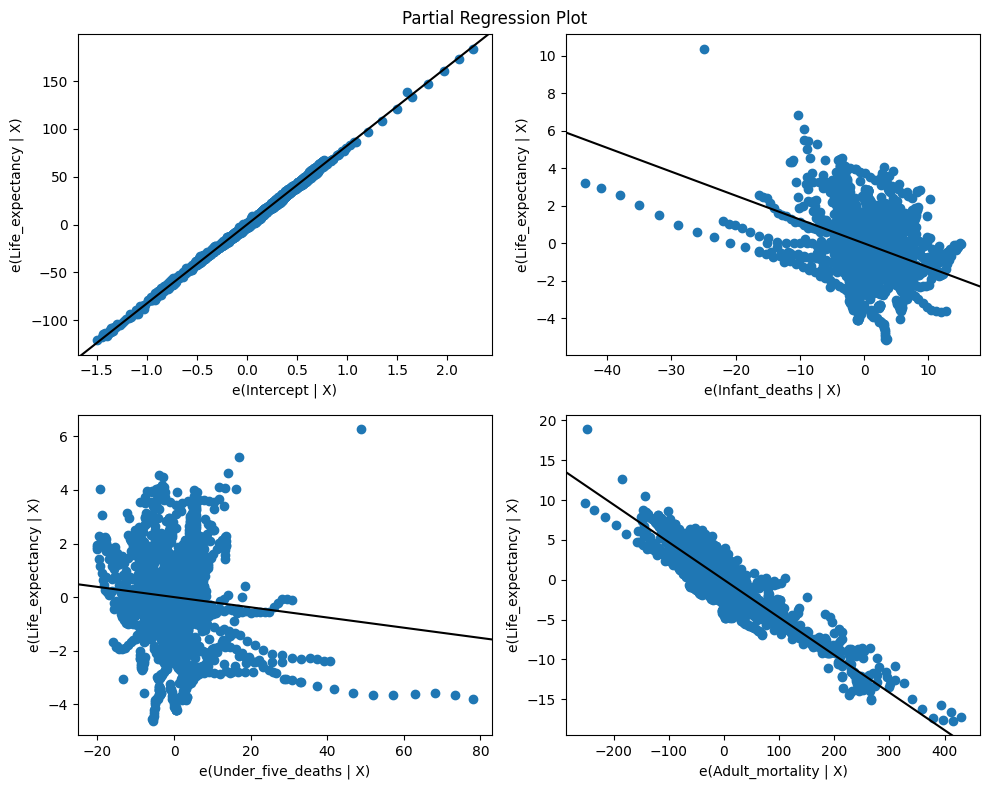

In [ ]:
# ols_equations['name'] = ds
# ols_equations['transformed'] = False
# ols_equations['cm_pearson'] = dfs[ds][['x','y']].corr(method = 'pearson')
# ols_equations['mu_x'] = np.mean(dfs[ds]['x'])
# ols_equations['mu_y'] = np.mean(dfs[ds]['y'])
# ols_equations['sig_x'] = np.std(dfs[ds]['x'], ddof=1)
# ols_equations['sig_y'] = np.std(dfs[ds]['y'], ddof=1)
# ols_equations['beta_1'] = ols_equations['sig_y']/ols_equations['sig_x'] * ols_equations['cm_pearson'].loc['x', 'y']
# ols_equations['beta_0'] = ols_equations['mu_y'] - ols_equations['beta_1'] * ols_equations['mu_x']
# ols_equations['ols'] = sm.ols('y ~ x', data = dfs[ds]).fit()
# ols_equations['intercept'] = ols_equations['ols'].params[0]
# ols_equations['slope'] = ols_equations['ols'].params[1]

# # finally update dataset with estimates
# dfs[ds]['y_est'] = ols_equations['intercept'] + ols_equations['slope'] * dfs[ds].x

# # calculate residuals
# dfs[ds]['residuals'] = dfs[ds]['y_est'] - dfs[ds]['y']

# # and save ols summary
# ols_equations['summary'] = m.summary()

# For visual inspection of the regression models
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot, plot_partregress_grid

reg1.params
intercept = reg1.params['Intercept']
dfa['X'] = dfa['Infant_deaths'] * reg1.params['Infant_deaths'] + dfa['Under_five_deaths']*reg1.params['Under_five_deaths'] + dfa['Adult_mortality']*reg1.params['Adult_mortality']
dfa['LE_est_mortality'] = intercept + dfa['Infant_deaths'] * reg1.params['Infant_deaths'] + dfa['Under_five_deaths']*reg1.params['Under_five_deaths'] + dfa['Adult_mortality']*reg1.params['Adult_mortality']
dfa['LE_mortality_res'] = dfa['LE_est_mortality']-dfa['Life_expectancy']

fig = plt.figure(figsize=(10,8))
fig = plot_partregress_grid(reg1,fig = fig)


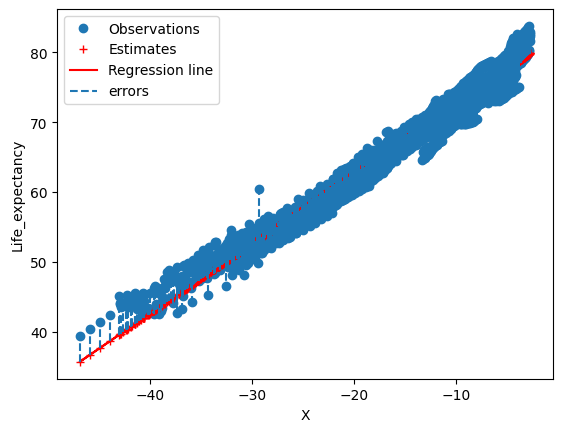

In [ ]:
plt.plot(dfa['X'], dfa['Life_expectancy'], 'o', label = 'Observations')
plt.xlabel('X')
plt.ylabel('Life_expectancy')

# Draw estimates
plt.plot(dfa['X'], dfa['LE_est_mortality'], 'r+', label='Estimates')

# Plot regression line
plt.plot(dfa['X'], dfa['LE_est_mortality'], 'r-', label='Regression line')

# Plot errors
plt.vlines(dfa['X'], dfa['LE_est_mortality'], dfa['Life_expectancy'], linestyles='dashed', label = 'errors')

# Add legend
plt.legend()
plt.show()

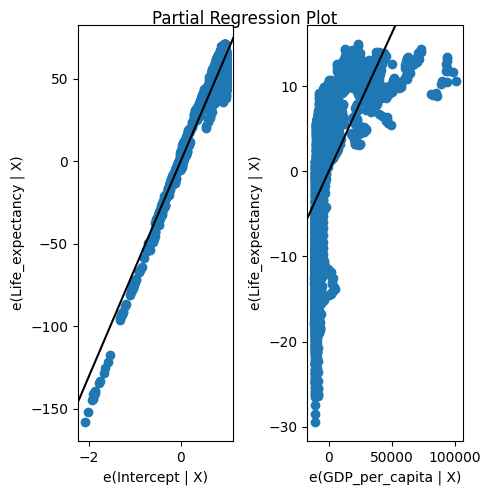

In [ ]:
# Life expectancy vs GDP
reg2.params
intercept = reg2.params['Intercept']
dfa['LE_est_gdp'] = intercept + dfa['GDP_per_capita'] * reg2.params['GDP_per_capita']
dfa['LE_gdp_res'] = dfa['LE_est_gdp']-dfa['Life_expectancy']

fig = plt.figure(figsize=(5,5))
fig = plot_partregress_grid(reg2,fig = fig)


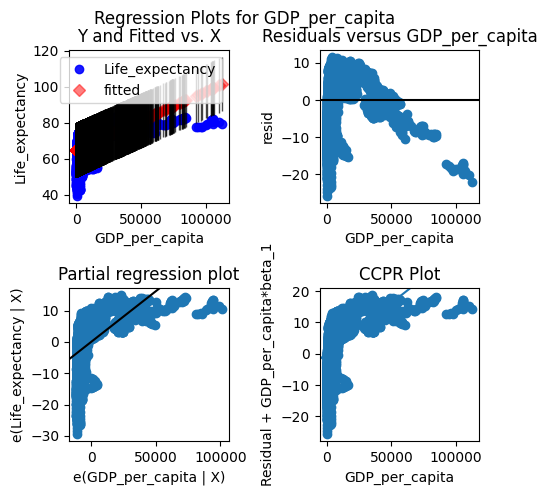

In [ ]:
fig = plt.figure(figsize=(5,5))
fig = plot_regress_exog(reg2, "GDP_per_capita", fig = fig)


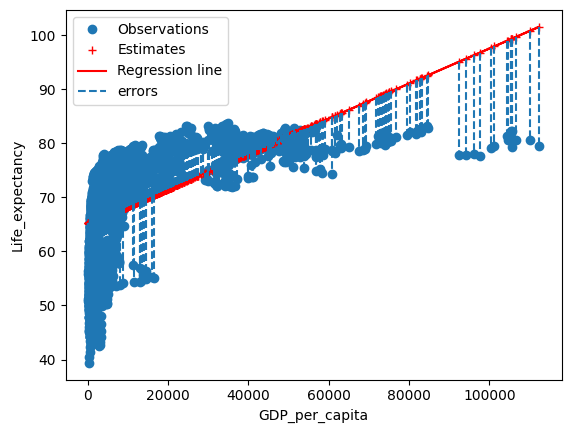

In [ ]:
plt.plot(dfa['GDP_per_capita'], dfa['Life_expectancy'], 'o', label = 'Observations')
plt.xlabel('GDP_per_capita')
plt.ylabel('Life_expectancy')

# Draw estimates
plt.plot(dfa['GDP_per_capita'], dfa['LE_est_gdp'], 'r+', label='Estimates')

# Plot regression line
plt.plot(dfa['GDP_per_capita'], dfa['LE_est_gdp'], 'r-', label='Regression line')

# Plot errors
plt.vlines(dfa['GDP_per_capita'], dfa['LE_est_gdp'], dfa['Life_expectancy'], linestyles='dashed', label = 'errors')

# Add legend
plt.legend()
plt.show()

# Conclusions:

From visual inspection some regions could be expressed in a linear function while others could not but the scale of these intervals is troublesome.

Life expectancy according to this data is measured at some point in the future. Usually about 70+ years. Whereas, GDP is measured yearly.

To identify if GDP impacts Life Expectancy, we would need to compare the average GDP with an interval of about 70 years. Consider the following for illustration.

There are 2 significant economic events in this dataset.
1. - the dot-com bubble of the early 2000's
2. - the financial crisis of 2007/2008

But as we can observe life expectancy remained constant. So is GDP per capita truly a dependent variable of life expectancy?

If it were, we would expect to see a decrease in life expectancy in the years following these events but the averages do not exhibit a relationship. How far in the future would life expectancy be impacted?

If in 2001 GDP significantly declined due to economic factors, would we measure life expectancy declines within the same year? 5yrs later in 2006? 20yrs later in 2021? 50yrs later in 2051?

In 5yrs from 2001, some people would have retired at age 65, but the same is true 50yrs later. Were the reitrement groups of 2006 impacted by the decline in GDP growth or was it delayed until 2051



World wide average of data for all regions shows a divergence pattern.

